<a id="2"></a>
<h1 style="background-color:#87CEEB;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Weather Type Classification </h1>

### <b><span style='color:#d2f0fc'>|</span> Data Overview</b>

This dataset is synthetically generated to mimic weather data for classification tasks. It includes various weather-related features and categorizes the weather into four types: **Rainy, Sunny, Cloudy, and Snowy.** This dataset is designed for practicing classification algorithms, data preprocessing, and outlier detection methods.

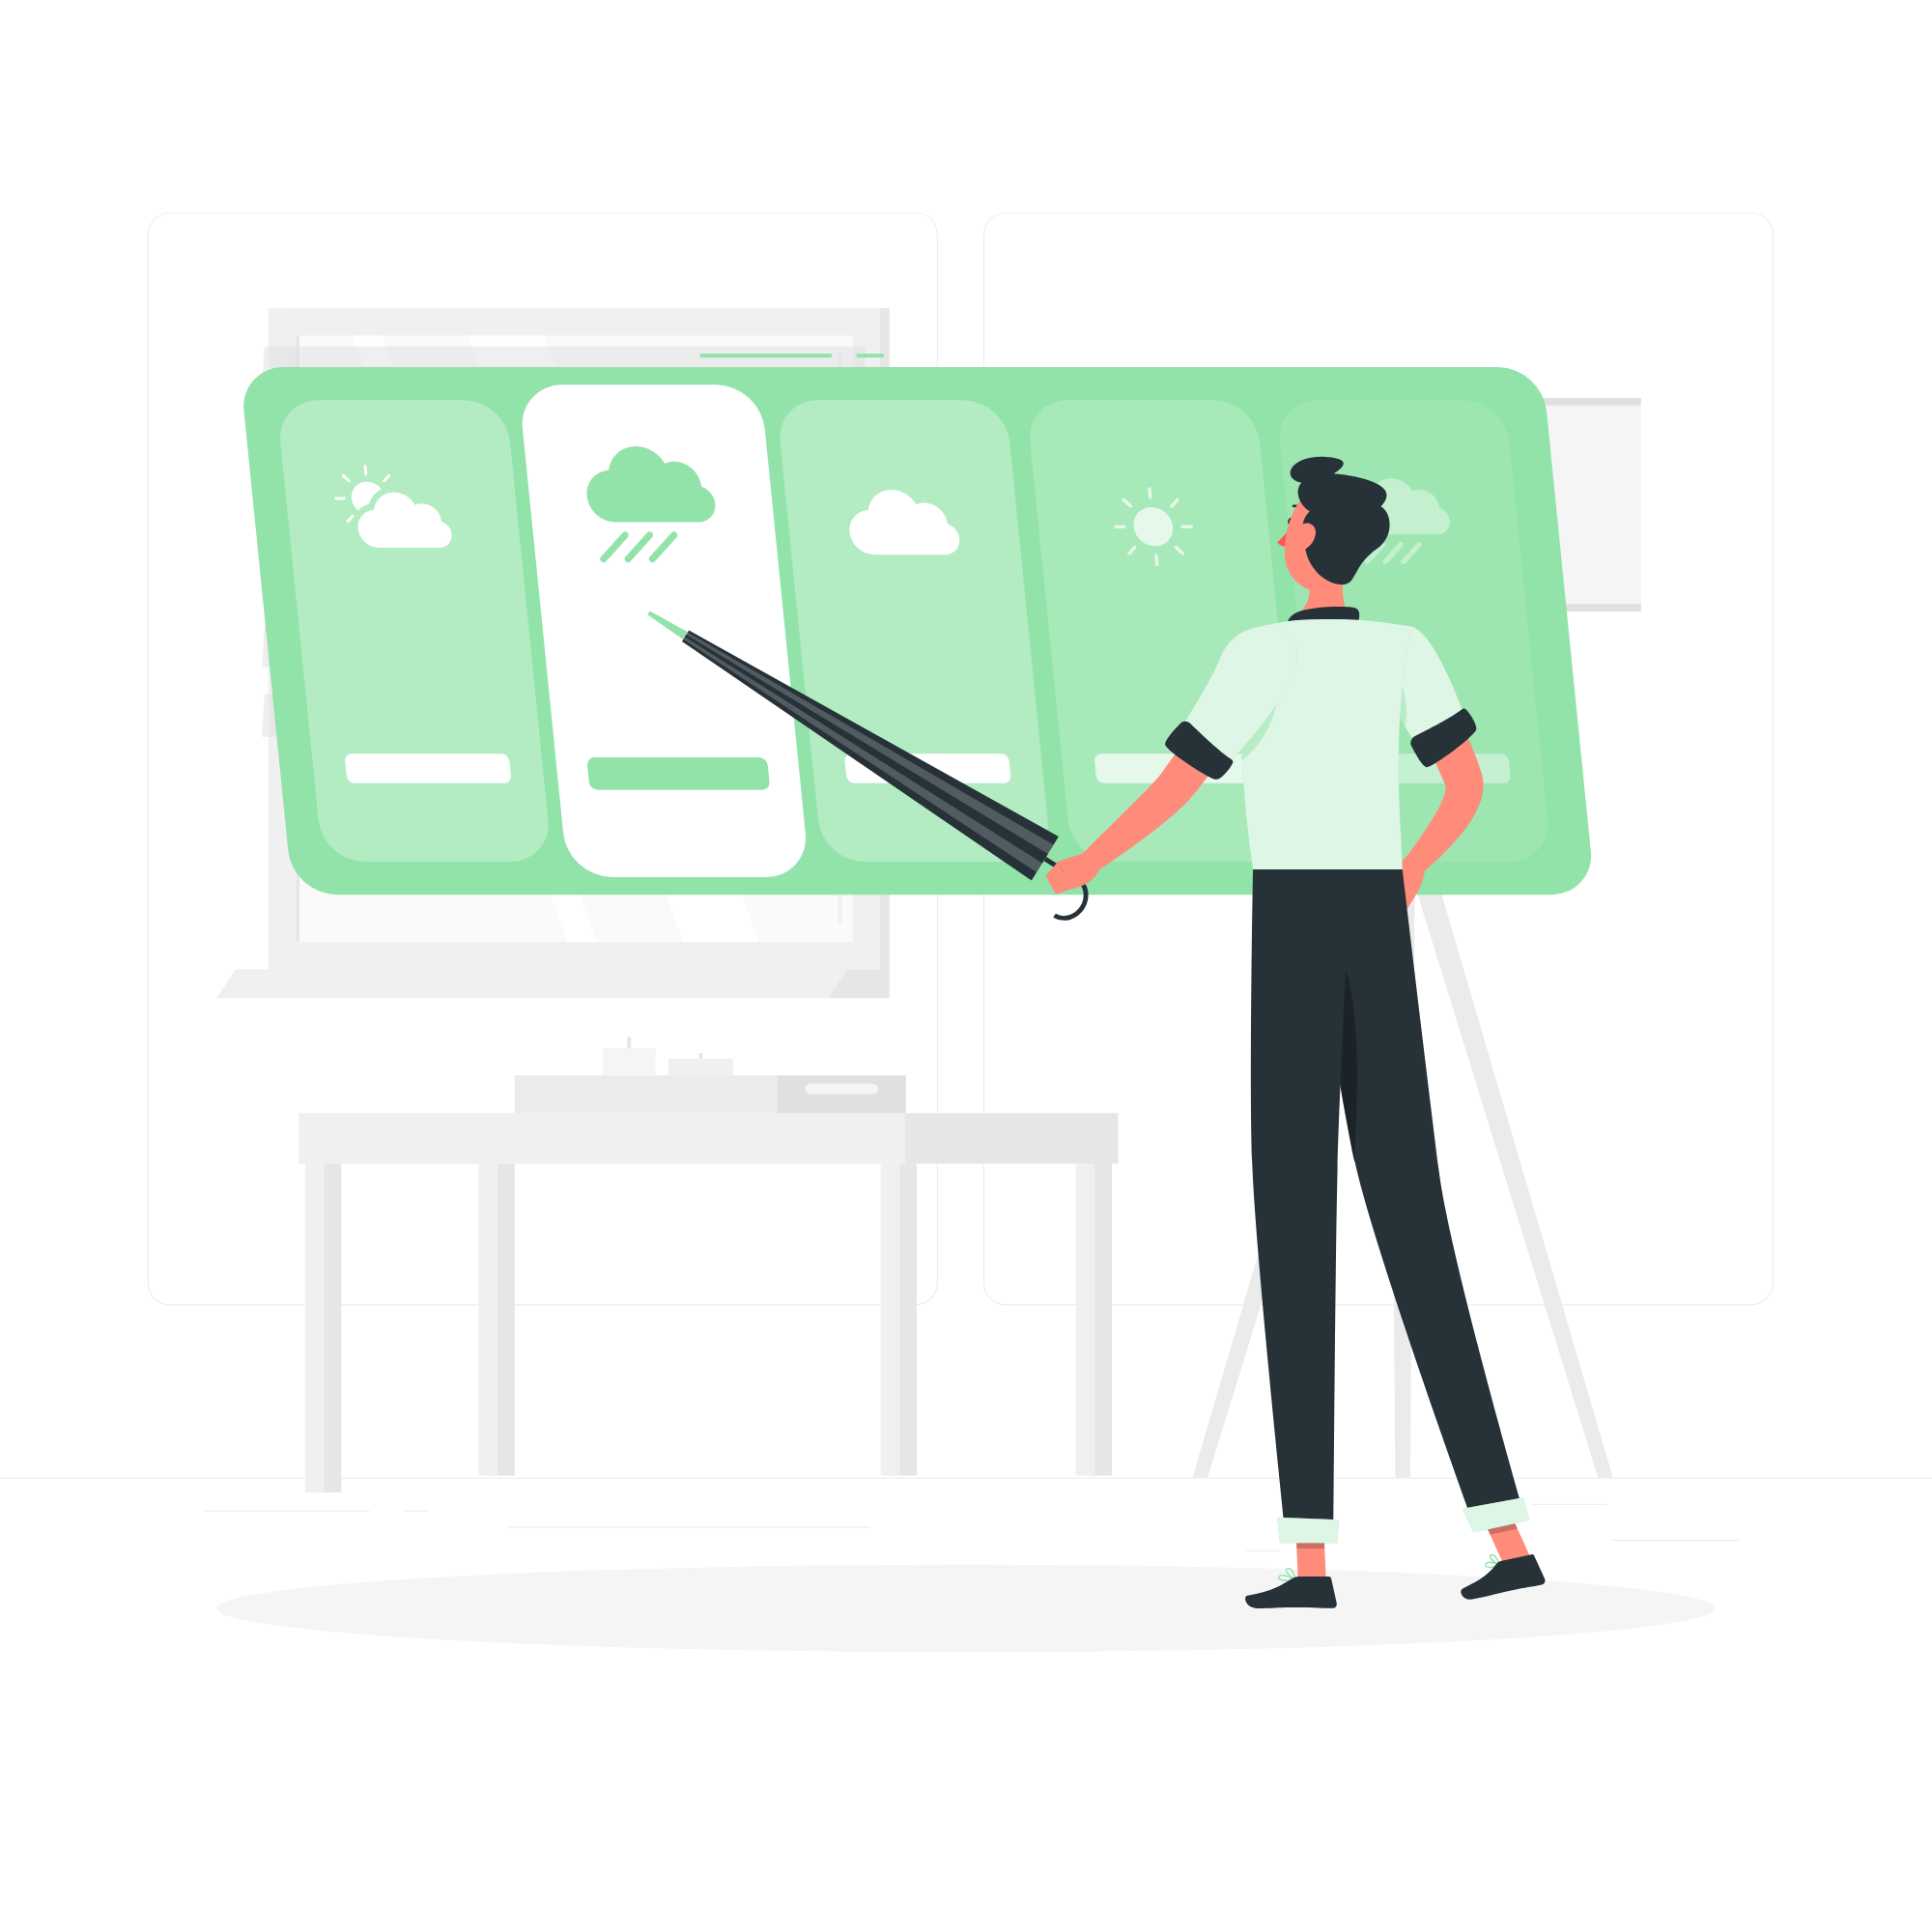

### <b><span style='color:#d2f0fc'>|</span> Variables</b>

<br>

1. **`Temperature` [numeric] :** The temperature in degrees Celsius, ranging from extreme cold to extreme heat.
2. **`Humidity` [numeric]:** The humidity percentage, including values above 100% to introduce outliers.
3. **`Wind Speed` [numeric]:** The wind speed in kilometers per hour, with a range including unrealistically high values.
4. **`Precipitation` (%) [numeric]:** The precipitation percentage, including outlier values.
5. **`Cloud Cover` [categorical]:** The cloud cover description.
6. **`Atmospheric Pressure` [numeric]:** The atmospheric pressure in hPa, covering a wide range.
7. **`UV Index` [numeric]:** The UV index, indicating the strength of ultraviolet radiation.
8. **`Season` [categorical]:** The season during which the data was recorded.
9. **`Visibility (km)` [numeric]:** The visibility in kilometers, including very low or very high values.
10. **`Location` [categorical]:** The type of location where the data was recorded.
11. **`Weather Type` [categorical]:** The target variable for classification, indicating the weather type.

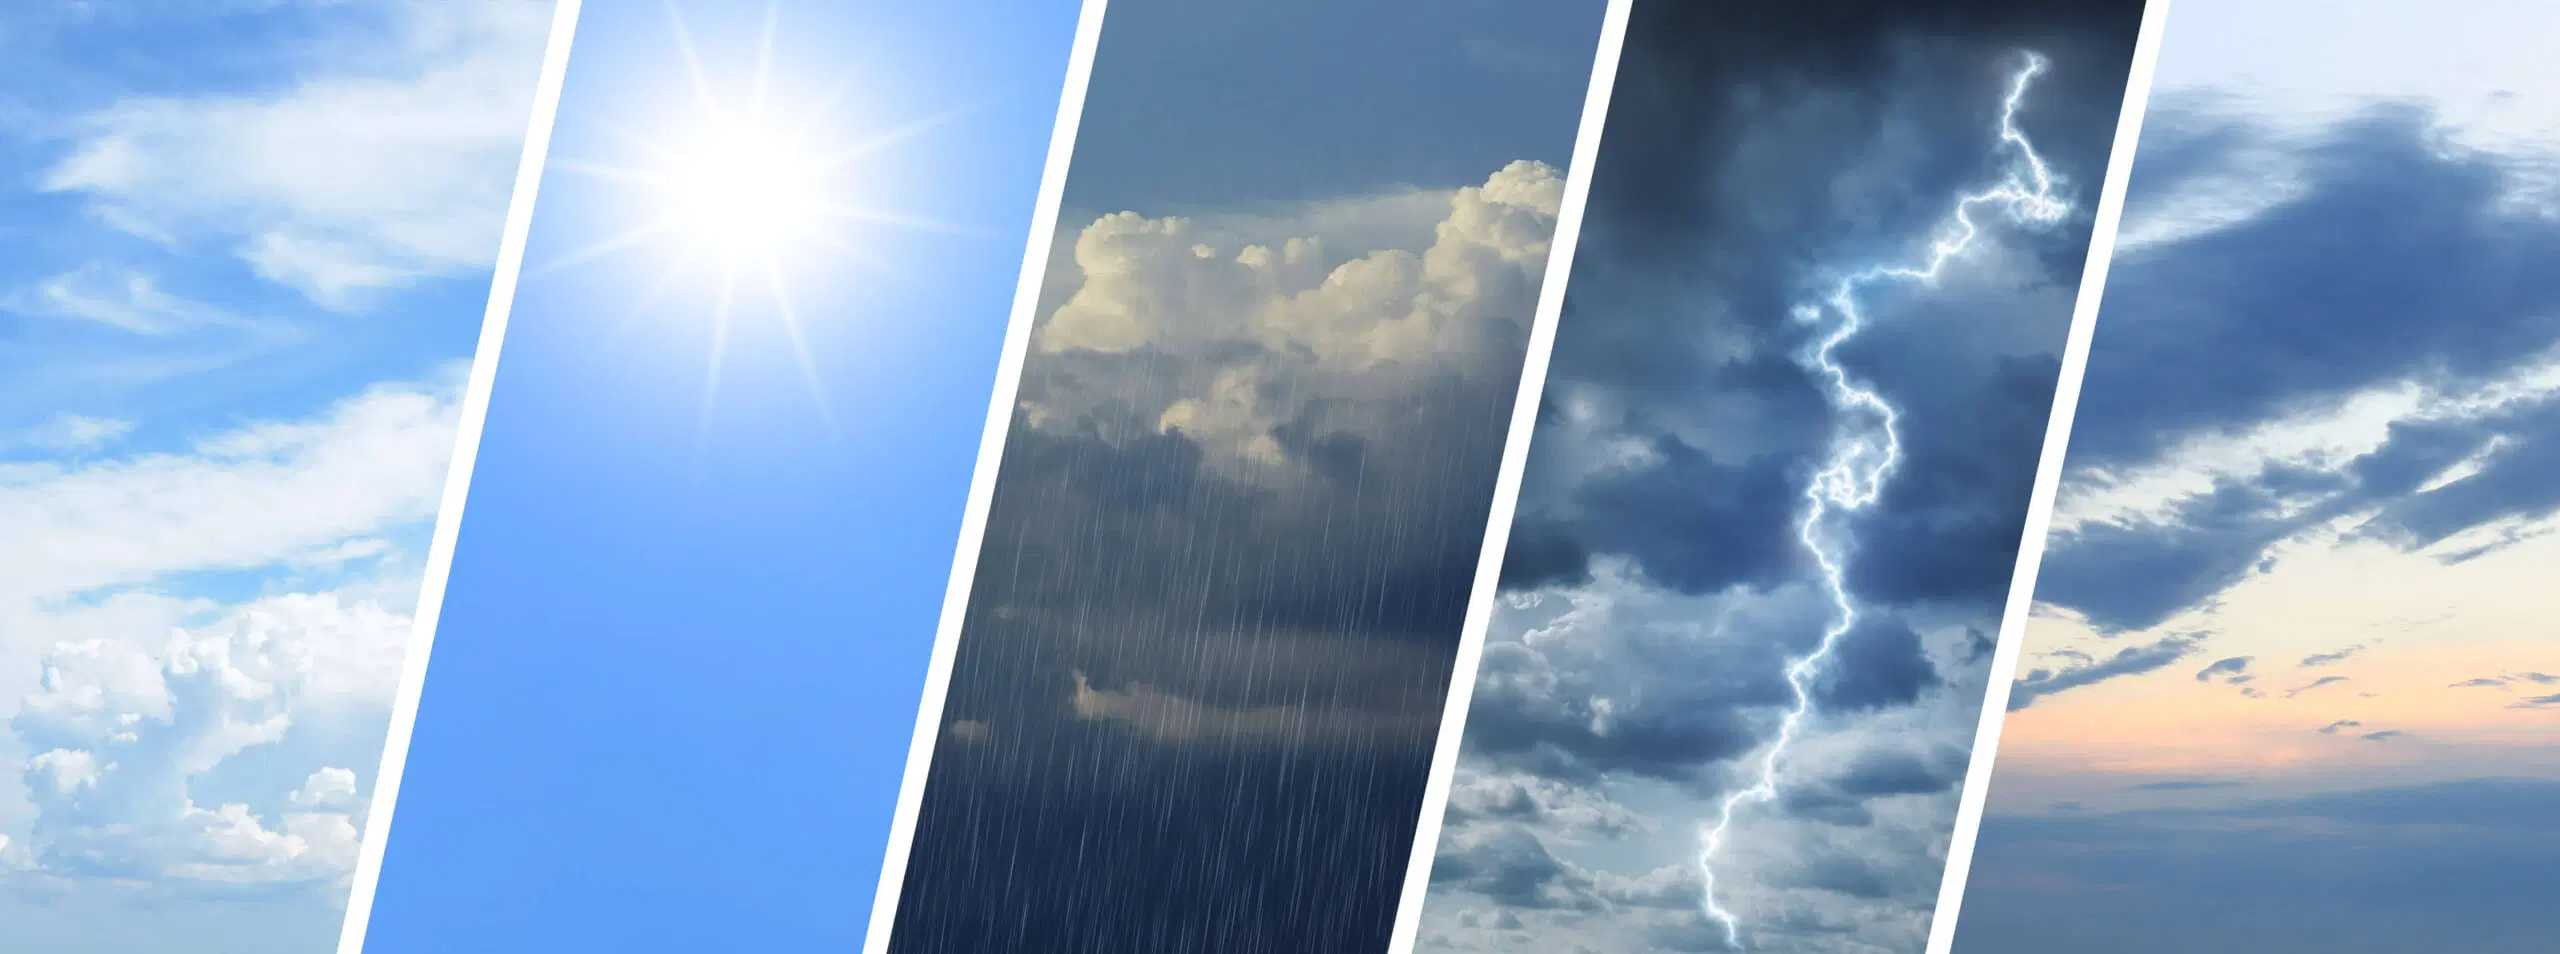

<a id="2.1"></a>
<h3 style="background-color:#d2f0fc; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Libraries</h3>

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the weather type dataset
df = pd.read_csv(r"C:\Users\user\Downloads\weather_classification_data.csv")

<a id="2.1"></a>
<h3 style="background-color:#d2f0fc; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">EDA</h3>

In [3]:
print(f'Number of rows in dataset = {df.shape[0]}')
print(f'Number of columns in dataset = {df.shape[1]}')

Number of rows in dataset = 13200
Number of columns in dataset = 11


In [4]:
df.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


In [5]:
df.tail()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy
13199,-5.0,38,0.0,92.0,overcast,1015.37,5,Autumn,10.0,mountain,Rainy


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [7]:
for column in df.columns:
    number_of_distinct_values = len(df[column].unique())
    print(f"{column}: {number_of_distinct_values} distinct values")

Temperature: 126 distinct values
Humidity: 90 distinct values
Wind Speed: 97 distinct values
Precipitation (%): 110 distinct values
Cloud Cover: 4 distinct values
Atmospheric Pressure: 5456 distinct values
UV Index: 15 distinct values
Season: 4 distinct values
Visibility (km): 41 distinct values
Location: 3 distinct values
Weather Type: 4 distinct values


In [8]:
# Find and count duplicate records if any
num_duplicates = len(df[df.duplicated()])

print("Number of duplicate records:", num_duplicates)

Number of duplicate records: 0


In [9]:
# Find and count null values if any
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [10]:
sns.set_palette("Blues")
sns.set_style('dark')

In [11]:
plt.rcParams['font.family'] = 'Times New Roman'

In [12]:
def plot_histogram(data, column_name, bins=20, kde=True, alpha=1):
    # Create a histogram with the specified color palette
    sns.histplot(data[column_name], bins=bins, kde=kde, alpha=alpha, color='#87CEEB')  # Using a sky blue color

    plt.title(f'{column_name} Distribution', fontsize=18)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    plt.show()

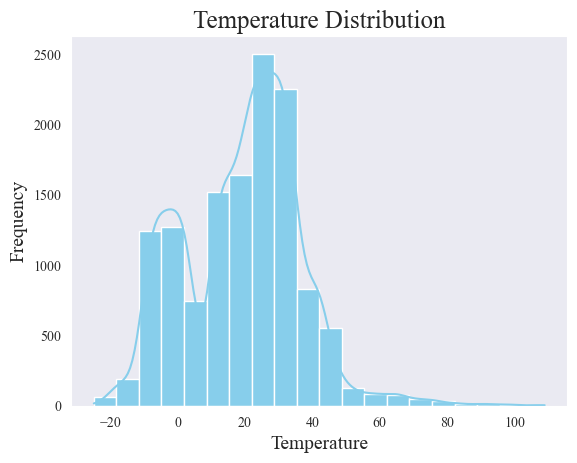

In [13]:
plot_histogram(df, 'Temperature')

In [14]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

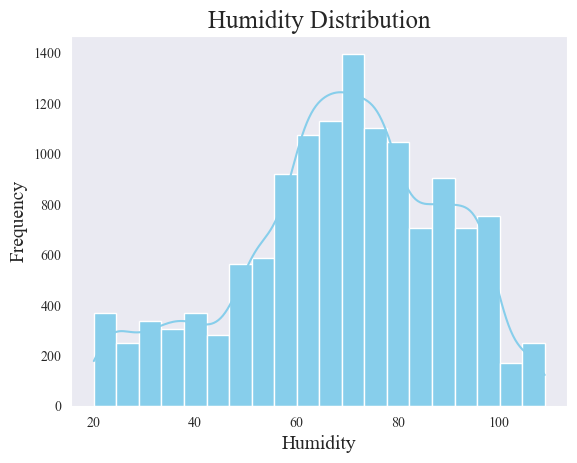

In [15]:
plot_histogram(df, 'Humidity')

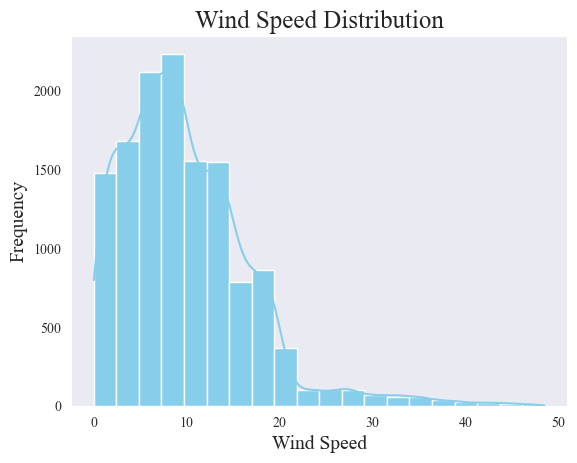

In [16]:
plot_histogram(df, 'Wind Speed')

<a id="2"></a>
<h1 style="background-color:#87CEEB;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Modeling </h1>

<a id="2.1"></a>
<h3 style="background-color:#d2f0fc; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 7px; border-radius: 15px;">Libraries</h3>

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix

<a id="2.1"></a>
<h3 style="background-color:#d2f0fc; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 7px; border-radius: 15px;">Train Test Split</h3>

In [20]:
X = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location']]      # Features

Y = df['Weather Type']                    # Target

# Train_Test Split
x_train , x_test , y_train , y_test = train_test_split(X, Y, test_size=0.2, random_state=21, shuffle = True, stratify=Y)

<a id="2.1"></a>
<h3 style="background-color:#d2f0fc; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 7px; border-radius: 15px;">Standardization & Encoding</h3>

In [21]:
# Categorical features
categorical_features = [col for col in X.columns if df[col].dtype == "O"]
categorical_features

['Cloud Cover', 'Season', 'Location']

In [22]:
# Numeric Features
numeric_features = [col for col in df.columns if df[col].dtype != "O" and col != 'Weather Type']
numeric_features

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'UV Index',
 'Visibility (km)']

In [23]:
# Building the transformation pipeline
pipeline = ColumnTransformer([
    ("scaler", StandardScaler(), numeric_features),
    ("encoder", OneHotEncoder(), categorical_features)
])

In [24]:
pipeline

ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'Atmospheric Pressure',
                                  'UV Index', 'Visibility (km)']),
                                ('encoder', OneHotEncoder(),
                                 ['Cloud Cover', 'Season', 'Location'])])

In [25]:
# Fit and transform the training data and only transform the test data
x_train_transformed = pipeline.fit_transform(x_train)
x_test_transformed = pipeline.transform(x_test)

In [26]:
# Get feature names after OneHotEncoder transformation
ohe_feature_names = pipeline.named_transformers_['encoder'].get_feature_names_out(categorical_features)

# Combine all feature names
all_feature_names = numeric_features + list(ohe_feature_names)

# Recreate DataFrames with the new feature names
x_train = pd.DataFrame(x_train_transformed, columns=all_feature_names, index=x_train.index)
x_test = pd.DataFrame(x_test_transformed, columns=all_feature_names, index=x_test.index)
# Now x_train_df and x_test_df are DataFrames with feature names

<a id="2.1"></a>
<h3 style="background-color:#d2f0fc; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 7px; border-radius: 15px;">Logistic Regression</h3>

In [27]:
lr = LogisticRegression()

param_grid = {'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2']}

In [28]:
grid = GridSearchCV(lr,param_grid)
grid.fit(x_train,y_train)
grid.best_params_

C:\Users\user\anaconda5\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda5\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

{'C': 10, 'penalty': 'l2'}

In [36]:
lr_tuned = LogisticRegression(C = 10, penalty = 'l2')
lr_tuned.fit(x_train,y_train)

C:\Users\user\anaconda5\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10)

In [38]:
lr_tuned_pred = lr_tuned.predict(x_test)

In [39]:
print('Accuracy Score: ',round(accuracy_score(y_test,lr_tuned_pred), 3)*100,'%')
print('F1 Score: ',round(f1_score(y_test, lr_tuned_pred, average='weighted'), 3)*100,'%')
print('Precision Score: ',round(precision_score(y_test, lr_tuned_pred, average='weighted'), 3)*100,'%')
print('Recall Score: ',round(recall_score(y_test, lr_tuned_pred, average='weighted'), 3)*100,'%')

Accuracy Score:  86.7 %
F1 Score:  86.7 %
Precision Score:  86.8 %
Recall Score:  86.7 %


<a id="2.1"></a>
<h3 style="background-color:#d2f0fc; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 7px; border-radius: 15px;">Decision Tree</h3>

In [41]:
dt = DecisionTreeClassifier()

param_grid = {'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [42]:
grid = GridSearchCV(dt,param_grid)
grid.fit(x_train,y_train)
grid.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [43]:
dt_tuned = DecisionTreeClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 2)
dt_tuned.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
dt_tuned_pred = dt_tuned.predict(x_test)

In [45]:
print('Accuracy Score: ',round(accuracy_score(y_test,dt_tuned_pred), 3)*100,'%')
print('F1 Score: ',round(f1_score(y_test, dt_tuned_pred, average='weighted'), 3)*100,'%')
print('Precision Score: ',round(precision_score(y_test, dt_tuned_pred, average='weighted'), 3)*100,'%')
print('Recall Score: ',round(recall_score(y_test, dt_tuned_pred, average='weighted'), 3)*100,'%')

Accuracy Score:  90.3 %
F1 Score:  90.3 %
Precision Score:  90.3 %
Recall Score:  90.3 %


<a id="2.1"></a>
<h3 style="background-color:#d2f0fc; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 7px; border-radius: 15px;">Random Forest</h3>

In [46]:
rfc = RandomForestClassifier()

n_estimators =[64,100,128,200]
max_features = [2,3,5,7]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

In [47]:
grid = GridSearchCV(rfc,param_grid)
grid.fit(x_train,y_train)
grid.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 100}

In [49]:
rfc_tuned = RandomForestClassifier(max_features=3,n_estimators=100,bootstrap=False)
rfc_tuned.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_features=3)

In [52]:
rfc_tuned_pred = rfc_tuned.predict(x_test)

Accuracy Score:  91.2 %
F1 Score:  91.2 %
Precision Score:  91.3 %
Recall Score:  91.2 %


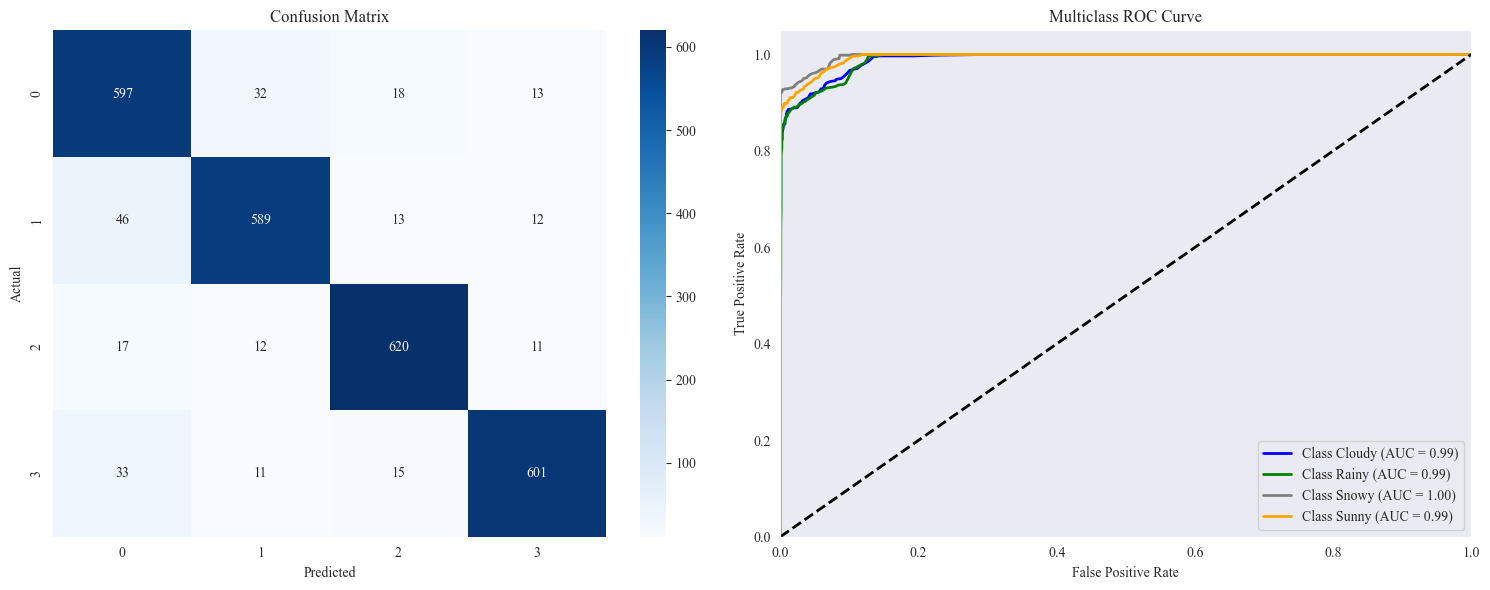

In [53]:
print('Accuracy Score: ',round(accuracy_score(y_test,rfc_tuned_pred), 3)*100,'%')
print('F1 Score: ',round(f1_score(y_test, rfc_tuned_pred, average='weighted'), 3)*100,'%')
print('Precision Score: ',round(precision_score(y_test, rfc_tuned_pred, average='weighted'), 3)*100,'%')
print('Recall Score: ',round(recall_score(y_test, rfc_tuned_pred, average='weighted'), 3)*100,'%')

# Binarize the output for multiclass ROC curve
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rfc_tuned.predict_proba(x_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the Confusion Matrix and ROC Curves as subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Confusion Matrix
cm = confusion_matrix(y_test, rfc_tuned_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curves
colors = cycle(['blue', 'green', 'grey', 'orange'])  # Cycle through different colors for each class
for i, color in zip(range(n_classes), colors):
    ax[1].plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')
ax[1].plot([0, 1], [0, 1], 'k--', lw=2)
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Multiclass ROC Curve')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()